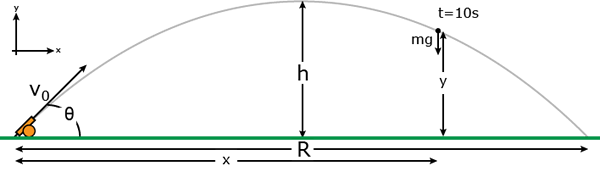

In [41]:
def updateState(X):
    "X in R^4 - > R^4"
    dt = 0.01#s
    m = 1
    g = 10#
    c =  0.1
    Xk1 = 4*[0]
    Xk1[0] = X[0]+dt*X[2] #xk1 = xk+ dt+vxk
    Xk1[1] = X[1]+dt*X[3] #yk1 = yk+ dt+vyk
    Xk1[2] = X[2]      -dt*c/m*X[2]         #vxk1 = vxk
    Xk1[3] = X[3]- dt*g-dt*c/m*X[3] #vyk1 = vyk - m*g*dt
    return Xk1
    
    

In [34]:
from math import *
theta = pi/4
vi = 100.0
X0 = [0,0,vi*sin(theta),vi*cos(theta)]
updateState(X0)

[0.7071067811865476, 0.7071067811865476, 70.67532277959543, 70.57532277959544]

In [35]:
updateState(updateState(updateState(X0)))

[2.120259860164558, 2.1172603601645585, 70.60466512564652, 70.30481510064655]

In [42]:
#X = X0
StateHistory= [X0]
for t in range(0,1_000_000):
    X = updateState(StateHistory[-1])
    StateHistory.append(X)
    if X[1]<0.0: break
print(X)

[491.2557945187015, -0.0035982785815155682, 21.585098666784624, -47.88896205348789]


In [37]:
X = X0
StateHistory= []
while (X[1]>=0):
    X = updateState(X)
    StateHistory.append(X)
print(X)

[668.6288078453537, -0.20333565814511, 37.27923772638719, -57.27915509843898]


In [38]:
len(StateHistory)

1280

In [43]:
import numpy as np

import matplotlib.pyplot as plt

def plotstate(timehistory):
    state = np.array(list(timehistory))

    plt.figure(figsize=(10, 5))
    plt.plot(state[:,0], state[:,1])
    plt.title("Cannonball Trajectory")
    plt.xlabel("Horizontal Distance (m)")
    plt.ylabel("Vertical Distance (m)")
    plt.grid(True)
    plt.show()

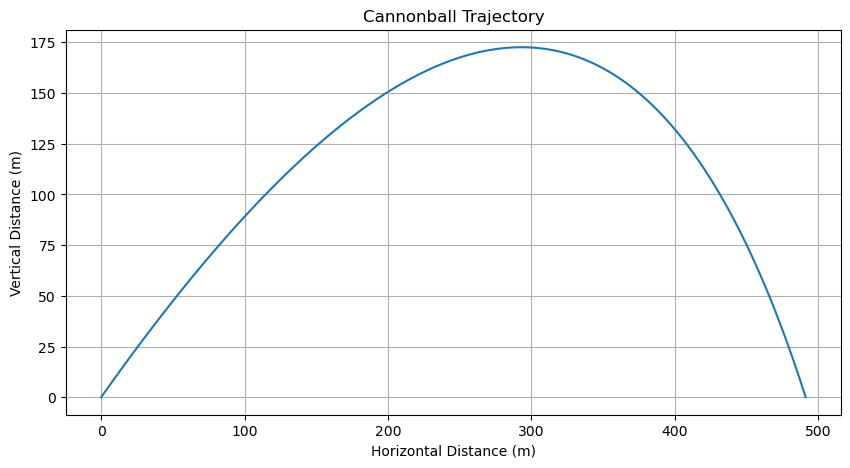

In [44]:
plotstate(StateHistory)

\
\
\
\
\
\
\ 
## How do we Use the update to calculate the state over time? 

\
\
\
\
\
\


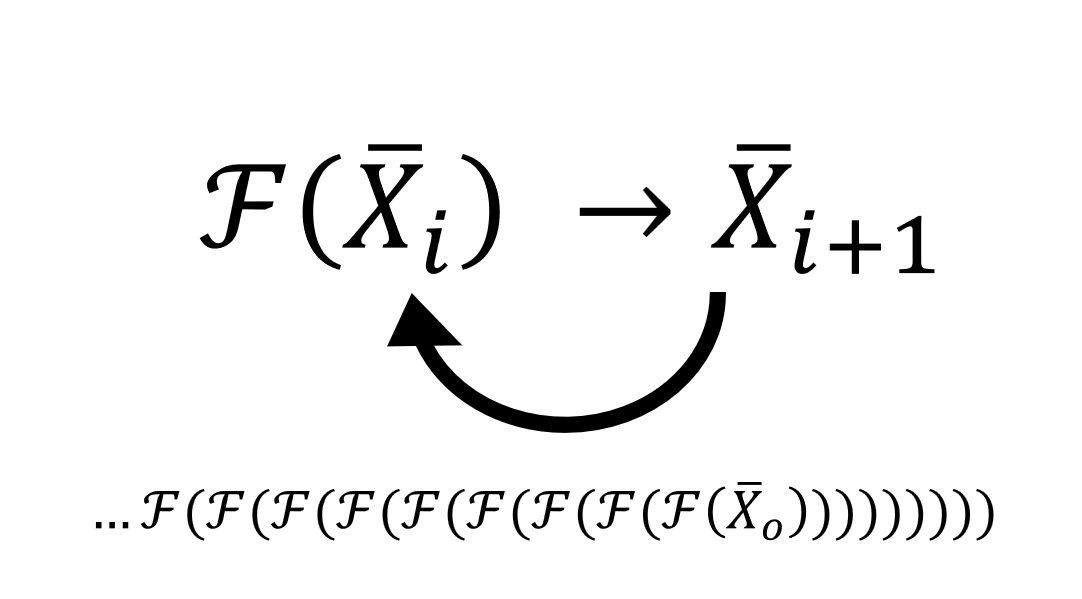
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\


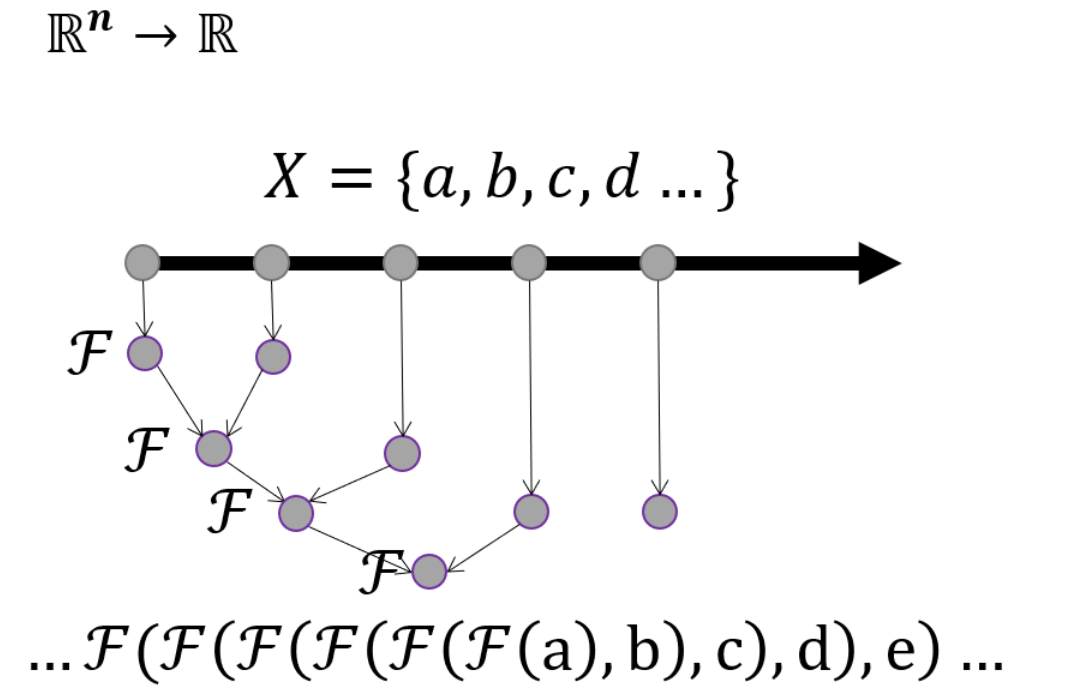

In [ ]:
from itertools import *

step = lambda x,y :updateState(x)


timehistory = accumulate(repeat(X0,1_000),step)
print(timehistory)

In [ ]:
plotstate(timehistory)

## What if we go longer? 

In [ ]:
timehistory = accumulate(repeat(X0,1_000_000),step)

In [ ]:
plotstate(timehistory)

## How can we stop the ball at the ground?? 
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\

In [ ]:
timehistory = filter(lambda x: x[1]>-0.01, accumulate(repeat(X0,1_000_000),step)) 

In [ ]:
plotstate(timehistory)

# Whats wrong with filter? 
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\

In [ ]:
timehistory = takewhile(lambda z: z[1]>-0.01, accumulate(repeat(X0,1_000_000_000),step)) 

In [ ]:
plotstate(timehistory)

In [ ]:
def updateStateBall(X):
    "X in R^4 - > R^4"
    dt = 0.01#s
    m = 1
    g = 10#
    theta = pi/4
    Xk1 = 4*[0]
    Xk1[0] = X[0]+dt*X[2] #xk1 = xk+ dt+vxk
    Xk1[1] = X[1]+dt*X[3] #yk1 = yk+ dt+vyk
    Xk1[2] = X[2]+ dt*m*g*sin(theta)         #vxk1 = vxk
    Xk1[3] = X[3]- dt*m*g*cos(theta) #vyk1 = vyk - m*g*dt
    return Xk1

In [ ]:
stepball = lambda x,y :updateStateBall(x)

In [ ]:
X0 = [0,100,0,0]
timehistory = takewhile(lambda z: z[1]>-0.01, accumulate(repeat(X0,1_000_000_000),stepball)) 

In [ ]:
plotstateball(timehistory)

In [ ]:
def plotstateball(timehistory):
    state = np.array(list(timehistory))

    plt.figure(figsize=(10, 5))
    plt.plot(state[:,0], state[:,1])
    plt.title("ball Trajectory")
    plt.xlabel("Horizontal Distance (m)")
    plt.ylabel("Vertical Distance (m)")
    plt.grid(True)
    plt.show()
    
    
    plt.figure(figsize=(10, 5))
    plt.plot(state[:,2])
    plt.title("ball X velocity")
    plt.xlabel("step ")
    plt.ylabel("horizontal speed  (m/s)")
    plt.grid(True)
    plt.show()
    
    
    plt.figure(figsize=(10, 5))
    plt.plot(state[:,3])
    plt.title("ball Y velocity")
    plt.xlabel("step ")
    plt.ylabel("vertical speed  (m/s)")
    plt.grid(True)
    plt.show()

Lets looks at code generated by ChatGPT using the prompt:
"give me a python program using functions and no classes that calculates the trajectory of a ball with drag and stores all the intermediate states and plots it
"

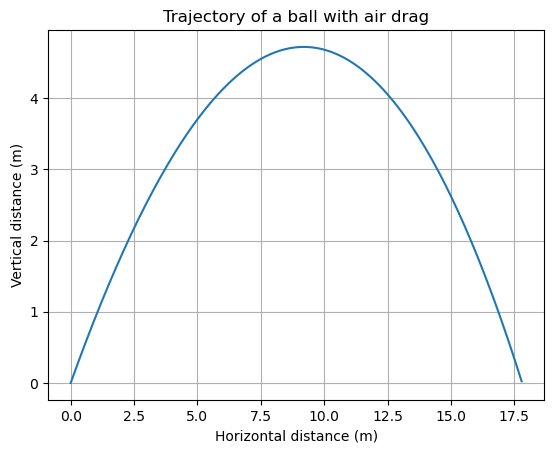

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def compute_forces(velocity, mass=1.0, drag_coef=0.1):
    g = 9.81  # gravity in m/s^2
    gravity_force = np.array([0, -mass * g])
    drag_force = -drag_coeff * velocity
    return gravity_force + drag_force

def update_position_velocity(position, velocity, dt=0.01, mass=1.0, drag_coeff=0.1):
    force = compute_forces(velocity, mass, drag_coeff)
    acceleration = force / mass
    new_velocity = velocity + acceleration * dt
    new_position = position + new_velocity * dt
    return new_position, new_velocity

def simulate_trajectory(initial_velocity, dt, mass=1.0, radius=0.1  , drag_coeff=0.1,  total_time=10, ):
    trajectory = [np.array([0.0, 0.0])]  # starting at origin
    velocities = [np.array(initial_velocity)]
    
    for _ in np.arange(0, total_time, dt):
        new_position, new_velocity = update_position_velocity(trajectory[-1], velocities[-1], dt, mass, drag_coeff)
        
        if new_position[1] < 0:  # Stop simulation if ball hits the ground
            break
        
        trajectory.append(new_position)
        velocities.append(new_velocity)
    
    return np.array(trajectory)

# Parameters
mass = 1.0             # kg
radius = 0.1           # m
drag_coeff = 0.1       # arbitrary value
initial_velocity = [10, 10]  # m/s (45 degree angle projection)
total_time = 10        # seconds
dt = 0.01              # time step in seconds

trajectory = simulate_trajectory(initial_velocity, dt, mass = 1.0, radius = 0.1, drag_coeff = 0.1,  total_time = 10 )

# Plotting
plt.plot(trajectory[:, 0], trajectory[:, 1])
plt.xlabel("Horizontal distance (m)")
plt.ylabel("Vertical distance (m)")
plt.title("Trajectory of a ball with air drag")
plt.grid(True)
plt.show()


#

compute_forces is a map that goes from Velocities to forces

update_position_velocity is a map from position and velocities to position and velocities

simulate_trajectory accumulates from Velocity and positition into a state trajecotry